## Olympic games  - Data exploration about  the participating countries, athletes, achievements and the relationship between them.

Hello my name is May Rozental (id:307929430), young computer science student who passionate about data science.


# Introduction

The theme of the final project is to examine the causes of success / failure in the Olympic Games over the years. We will analyze the data set that contains information about the Olympic Games in comparison with the world population index and GDP.

We will be asked guiding questions through which we will investigate in depth with the help of data analysis and data mining whether the connection between success / failure in the Olympic Games and the physical data of the contestants themselves or is related to the economic power of the country they come from.
To this end, we will create and be loyal to a model that will learn to predict the percentage of success for a contestant in winning a medal before a sport.

As is well known, the Olympic Games are the largest sporting event in the world since 1896, held every 4 years with the largest number of competitors in 26 different sports. Because of the size of the class and the scope of the competition, the Olympic medals are considered the most prestigious and the winners are considered the best in the world, and since the coverage around the Games is global, it is important that each country has adequate representation in the competition.

# Motivation and Purposes

Analyzing the data of the Olympic Games can be a significant and strategic tool in understanding the chances of success of any team.
Based on the long history of the Games, a model can be built for each sport in terms of age, height and weight of contestants with a greater chance of success and in addition measure the chance of success given the country's investment in the Olympic team (since we rely on GDP data richer countries More also in sports).

For this purpose, there are quite a few difficulties, such as missing appropriate data for analysis and difficulties in switching between many different types of data.

In order to overcome the obstacles I will try to explore additional options that may give help.


# Soruce of the data 

I use the olympics dataset from kaggle, and decided to merge it with gdp and population per capita that also from kaggle.

# Personal Code

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sys
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import sklearn as skl
from sklearn import linear_model,datasets
from sklearn.linear_model import LinearRegression
from sklearn.datasets._samples_generator import make_blobs
from sklearn.metrics import pairwise_distances_argmin

# EDA

In [2]:
#Let's read the first dataSet of dictionary.csv
gdp=pd.read_csv('/Users/mayrozental/Desktop/אוניברסיטה/מדמ״ח/סדנה במדעי הנתונים/DataSets/dictionary.csv')
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         201 non-null    object 
 1   Code            201 non-null    object 
 2   Population      196 non-null    float64
 3   GDP per Capita  176 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


In [3]:
gdp.rename(columns={'GDP per Capita':'GDP'},inplace=True)
gdp.head(10)

,Country,Code,Population,GDP
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
5,Angola,ANG,25021974.0,4101.472152
6,Antigua and Barbuda,ANT,91818.0,13714.731962
7,Argentina,ARG,43416755.0,13431.878340
8,Armenia,ARM,3017712.0,3489.127690
9,Aruba*,ARU,103889.0,NaN


In [4]:
total = gdp.isnull().sum().sort_values(ascending = False)
percent = (gdp.isnull().sum()/gdp.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
GDP,25,12.437811
Population,5,2.487562
Country,0,0.000000
Code,0,0.000000


Let's understand what we got.
We have 201 rows (countries) and 4 columns. The variables include country, code, population, product per capita.
In addition, it can be seen that out of the 201 countries - five countries lack population data and twenty-five of the countries lack GDP per capita data. Later we will understand whether these are overlapping countries and whether the lack of these countries can cause us any structural bias.

In [5]:
#Let's read the second dataSet of athlete_events.csv
athlete=pd.read_csv('/Users/mayrozental/Desktop/אוניברסיטה/מדמ״ח/סדנה במדעי הנתונים/DataSets/athlete_events.csv')
athlete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


We have 271,116 rows (All competitors who participated in the Games from 1896 to 2016) and 15 columns. The variables include ID ,Name ,Sex ,Age ,Height ,Weight ,Team ,Noc ,Games ,Year ,Season ,City ,Sport ,Event ,Medal. 

Let's check if there is missing data

In [6]:
total = athlete.isnull().sum().sort_values(ascending = False)
percent = (athlete.isnull().sum()/athlete.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Medal,231333,85.326207
Weight,62875,23.191180
Height,60171,22.193821
Age,9474,3.494445
ID,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Team,0,0.000000
NOC,0,0.000000
Games,0,0.000000


Now we can see how much values are null. 
We find that height and weight having more then 20% of missing data and Age 3.5% of missing values.

At this point we still do not know how this will affect the conclusions and prediction we want to reach.
Since at this stage we can get an indication that the missing values in the category of medals reflect the amount of people who did not win the medal.
For convenience we will replace these nulls with "DNW" meaning "did not win".

In [7]:
athlete['Medal'].fillna('DNW',inplace=True)
# DNW = did not win

After an overview of the two sets we have, we would like to make a merge.
We have two columns with different names (Noc and Code) but basically both represent the same values so we will change the Code to noc for merging the sets.

In [8]:
gdp.rename(columns={'Code':'NOC'},inplace=True)
merged=pd.merge(athlete,gdp,on='NOC',how='left')
# becuse the columns of Team and Country are the same ,we will drop from merged the column of country
# and change the name of team to country becasue in team you have more values.
merged=merged.drop(columns=['Country'])
merged.rename(columns={'Team':'Country'},inplace=True)
merged.drop(columns=['Games','Season'],inplace=True)
merged.info()
merged.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          271116 non-null  int64  
 1   Name        271116 non-null  object 
 2   Sex         271116 non-null  object 
 3   Age         261642 non-null  float64
 4   Height      210945 non-null  float64
 5   Weight      208241 non-null  float64
 6   Country     271116 non-null  object 
 7   NOC         271116 non-null  object 
 8   Year        271116 non-null  int64  
 9   City        271116 non-null  object 
 10  Sport       271116 non-null  object 
 11  Event       271116 non-null  object 
 12  Medal       271116 non-null  object 
 13  Population  243950 non-null  float64
 14  GDP         235905 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 33.1+ MB


,ID,Name,Sex,Age,Height,Weight,Country,NOC,Year,City,Sport,Event,Medal,Population,GDP
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,DNW,1.371220e+09,8027.683810
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,DNW,1.371220e+09,8027.683810
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,DNW,5.676002e+06,51989.293471
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,5.676002e+06,51989.293471
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,1.693652e+07,44299.768085


Let's learn about the int values in our dataset

In [9]:
merged.describe()
#we don't need istaticsal summary for ID feature
merged.iloc[:,1:].describe()

,Age,Height,Weight,Year,Population,GDP
count,261642.000000,210945.000000,208241.000000,271116.000000,2.439500e+05,235905.000000
mean,25.556898,175.338970,70.702393,1978.378480,1.008445e+08,32533.404069
std,6.393561,10.518462,14.348020,29.877632,2.257177e+08,20985.375946
min,10.000000,127.000000,25.000000,1896.000000,1.022200e+04,277.068309
25%,21.000000,168.000000,60.000000,1960.000000,9.798871e+06,12363.543460
50%,24.000000,175.000000,70.000000,1988.000000,3.799949e+07,36205.568102
75%,28.000000,183.000000,79.000000,2002.000000,7.910927e+07,43875.969614
max,97.000000,226.000000,214.000000,2016.000000,1.371220e+09,101449.968168


The description of the data on the merged table gives several directions to check. Among other things, we will try to understand who the winners of the medals are and whether their dry data such as age, height and weight correspond to the average age of the participants.
We'll get back to that later.

The example here shows for example how can we visual some of this categories by year

In [10]:
Countries_medals=merged[merged.Medal!='DNW']
Countries_medals.head()

,ID,Name,Sex,Age,Height,Weight,Country,NOC,Year,City,Sport,Event,Medal,Population,GDP
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,5676002.0,51989.293471
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,5482013.0,42311.036231
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,5482013.0,42311.036231
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,5482013.0,42311.036231
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,5482013.0,42311.036231


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Variation of Age for Male Athletes over time')

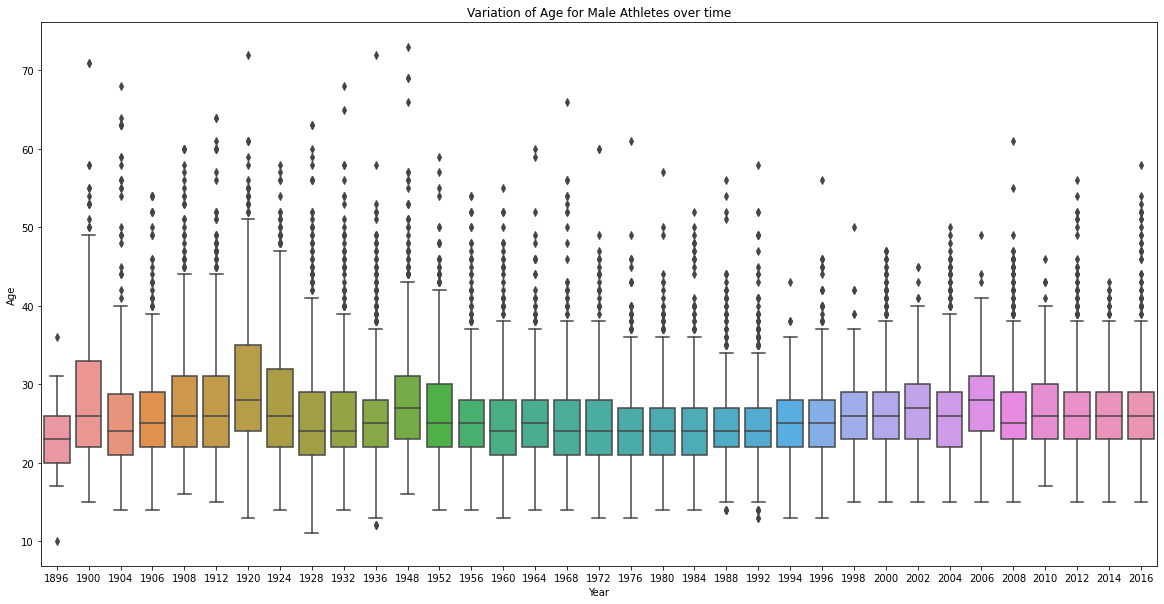

In [11]:
MenOverTime=(Countries_medals.Sex == 'M')
plt.figure(figsize=(20,10))
sns.boxplot(Countries_medals['Year'],Countries_medals['Age'], data=MenOverTime)

plt.title('Variation of Age for Male Athletes over time')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Variation of Height for Male Athletes over time')

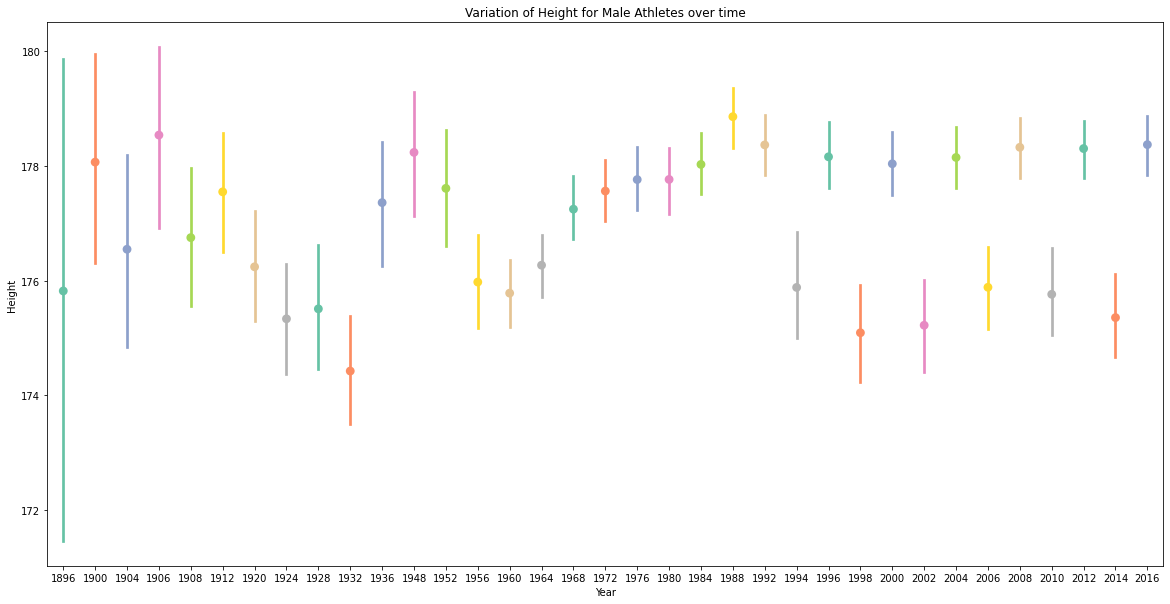

In [12]:
MenOverTime=(Countries_medals.Sex == 'M')
plt.figure(figsize=(20, 10))
sns.pointplot(Countries_medals['Year'], Countries_medals['Height'], data= MenOverTime, palette='Set2')
plt.title('Variation of Height for Male Athletes over time')

Text(0.5, 1.0, 'Height vs Weight of Olympic Medalists')

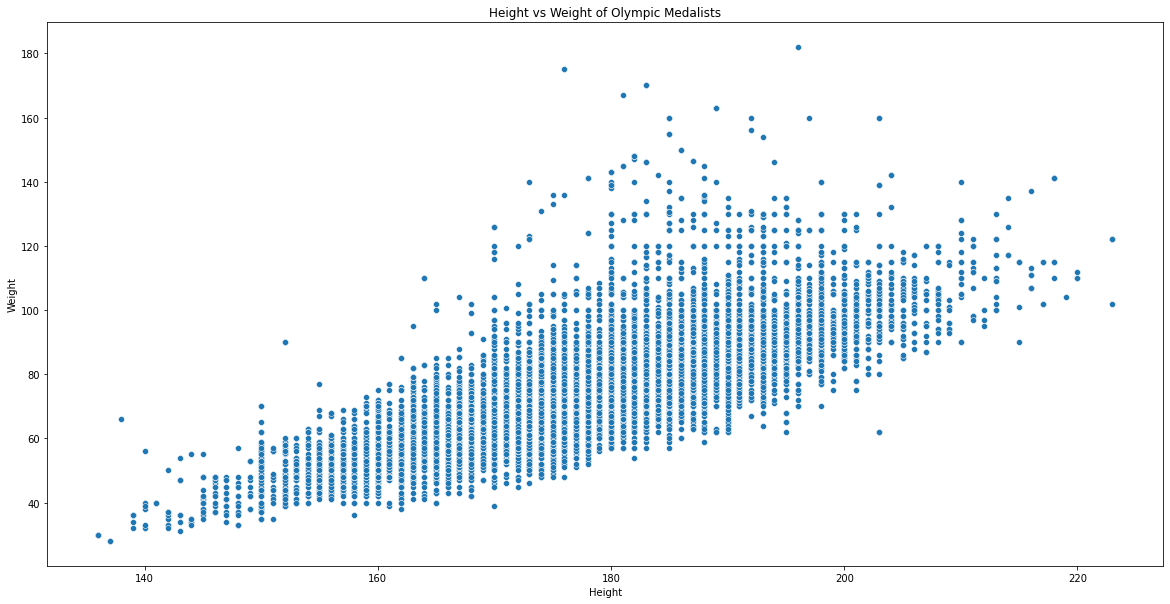

In [13]:
NOTNullMedals = Countries_medals[(Countries_medals['Height'].notnull()) & (Countries_medals['Weight'].notnull())]
plt.figure(figsize=(20, 10))
ax = sns.scatterplot(x="Height", y="Weight", data=NOTNullMedals)
plt.title('Height vs Weight of Olympic Medalists')

# We will examine different contexts in the context of medals

We will focus on the winners only and examine their status

In [14]:
Countries_medals.Country.value_counts().reset_index(name='Count')

,index,Count
0,United States,5219
1,Soviet Union,2451
2,Germany,1984
3,Great Britain,1673
4,France,1550
...,...,...
493,Camille,1
494,Iraq,1
495,Potsdam,1
496,Rostock,1


Text(0.5, 1.0, 'Medals per Country')

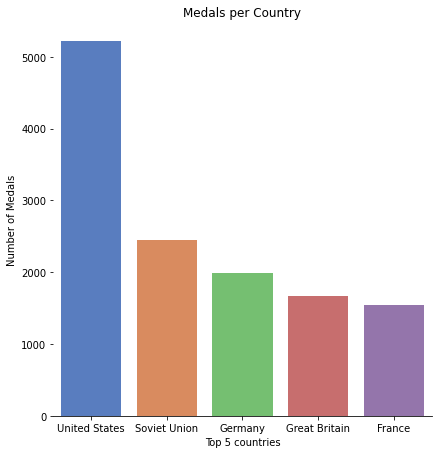

In [15]:
totalMedals = Countries_medals.Country.value_counts().reset_index(name='Medal').head()
g = sns.catplot(x="index", y="Medal", data=totalMedals,height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')

In [43]:
tmp=Countries_medals.groupby(['Country', 'Medal'])['ID'].count().dropna()
df=pd.DataFrame(tmp).reset_index()

dfG = df[df['Medal']=='Gold']
dfS = df[df['Medal']=='Silver']
dfB = df[df['Medal']=='Bronze']

def draw_map(dataset, title, colorscale,reversescale=False):
    trace = go.Choropleth(
                locations = dataset['Country'],
                locationmode='country names',
                z = dataset['ID'],
                text = dataset['Country'],
                autocolorscale =False,
                reversescale = reversescale,
                colorscale = colorscale,
                marker = dict(
                    line = dict(
                        color = 'rgb(0,0,0)',
                        width = 0.5)
                ),
                colorbar = dict(
                    title = 'Medals',
                    tickprefix = '')
            )
    data = [trace]
    layout = go.Layout(
        title = title,
        geo = dict(
            showframe = True,
            showlakes = False,
            showcoastlines = True,
            projection = dict(
                type = 'natural earth'
            )
        )
    )
    fig = dict( data=data, layout=layout )
    iplot(fig)


In [44]:
draw_map(dfG, "Countries with Gold Medals",'Greens')

In [45]:
draw_map(dfS, "Countries with Silver Medals",'Greys')

In [46]:
draw_map(dfB, "Countries with Borzen Medals",'Reds')

The data is not presented here as I wanted, the goal was for the color to be according to the amount of medals.
That is, so that a country that has won the most medals compared to other countries in 3 categories then that way its color will be darker.
I do not know if the problem is reading because of code errors or because of incorrect data selection.
it will be handled for the final project.

In [20]:
tmp = Countries_medals.groupby(['Year', 'City', 'Medal'])['ID'].agg('count').dropna()
df = pd.DataFrame(tmp).reset_index()
dfG = df[df['Medal']=='Gold']
dfS = df[df['Medal']=='Silver']
dfB = df[df['Medal']=='Bronze']

traceG = go.Bar(
    x = dfG['Year'],y = dfG['ID'],
    name="Gold",
     marker=dict(
                color='gold',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text = dfG['City'],
)
traceS = go.Bar(
    x = dfS['Year'],y = dfS['ID'],
    name="Silver",
    marker=dict(
                color='Grey',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfS['City'],
)

traceB = go.Bar(
    x = dfB['Year'],y = dfB['ID'],
    name="Bronze",
    marker=dict(
                color='Brown',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfB['City'],
)

data = [traceG, traceS, traceB]
layout = dict(title = 'Medals per Olympic edition',
          xaxis = dict(title = 'Year', showticklabels=True), 
          yaxis = dict(title = 'Number of medals'),
          hovermode = 'closest',
          barmode='stack'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='events-sports1')


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Distribution of Gold Medals')

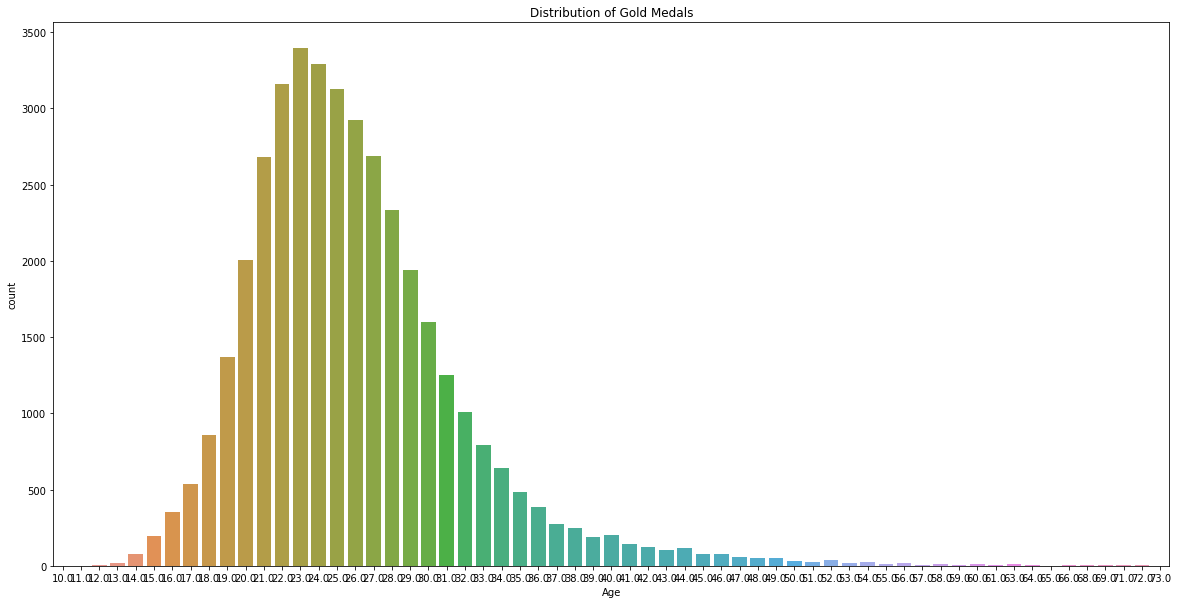

In [21]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(Countries_medals['Age'])
plt.title('Distribution of Gold Medals')

We now better understand why age 25 is the table average.
It is easy to see that most gold medal winners are around this age.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Gold Medals for Athletes between 23 and 27')

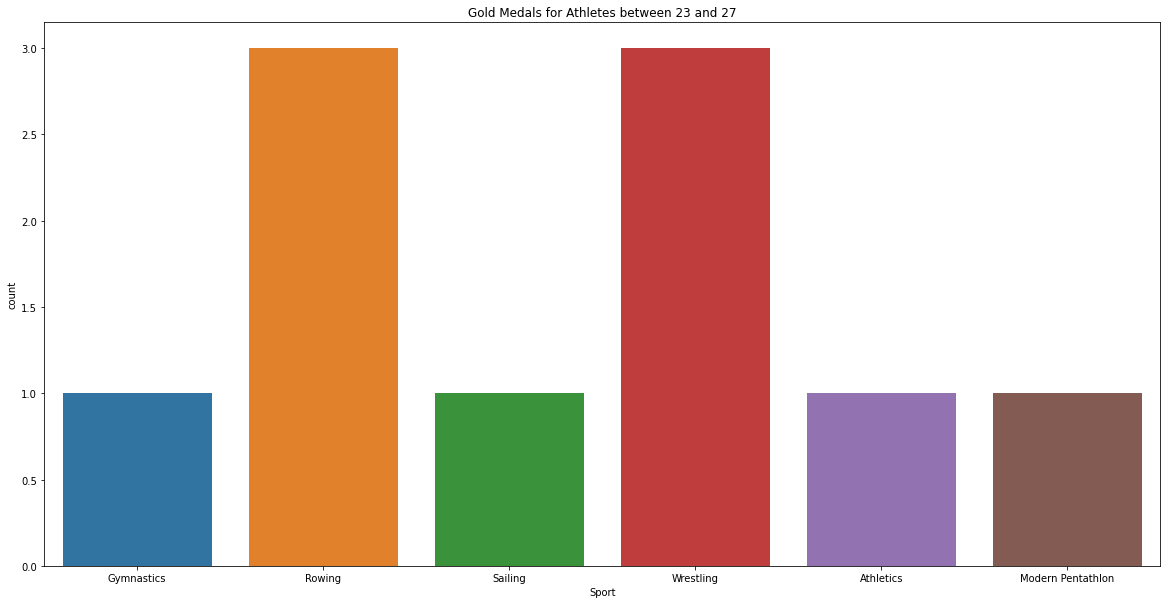

In [22]:
GOLDMEDALS = Countries_medals['Sport'][Countries_medals['Age'] > 23][Countries_medals['Age'] < 27].head(10)
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(GOLDMEDALS)
plt.title('Gold Medals for Athletes between 23 and 27')

In [23]:
tmp = Countries_medals.groupby(['Sport', 'Medal'])['ID'].agg('count').dropna()
df = pd.DataFrame(tmp).reset_index()
dfG = df[df['Medal']=='Gold']
dfS = df[df['Medal']=='Silver']
dfB = df[df['Medal']=='Bronze']

traceG = go.Bar(
    x = dfG['Sport'],y = dfG['ID'],
    name="Gold",
     marker=dict(
                color='gold',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text = dfG['Sport'],
    #orientation = 'h'
)
traceS = go.Bar(
    x = dfS['Sport'],y = dfS['ID'],
    name="Silver",
    marker=dict(
                color='Grey',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfS['Sport'],
    #orientation = 'h'
)

traceB = go.Bar(
    x = dfB['Sport'],y = dfB['ID'],
    name="Bronze",
    marker=dict(
                color='Brown',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfB['Sport'],
   # orientation = 'h'
)

data = [traceG, traceS, traceB]
layout = dict(title = 'Medals per sport',
          xaxis = dict(title = 'Sport', showticklabels=True, tickangle=45,
            tickfont=dict(
                size=8,
                color='black'),), 
          yaxis = dict(title = 'Number of medals'),
          hovermode = 'closest',
          barmode='stack',
          showlegend=False,
          width=900,
          height=600,
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='events-sports1')

very interesting!
If we compare the table of "Gold Medals for Athletes between 20 and 30" and "Medals per sport" it seems that the results do not overlap and it is strange.
That is if if the average age of the winners is 25 then yes there should be some overlap with the most decorated sport.
In the final project we will dive deeper and understand whether there is a connection between them.

## Does GDP play a part in medal tallies?
A higher GDP means more resources to allocate to sports!

We will create a new table that shows a direct relationship between a country and the amount of its total medals and its GDP

In [24]:
CM=Countries_medals.Country.value_counts().reset_index(name='Count_Medals')
CM.rename(columns={'index':'Country'},inplace=True)
N_Cm=pd.merge(CM,Countries_medals,on='Country',how='left')
N_Cm.drop(columns=['ID','Name','Sex','Age','Height','Weight','NOC','Year','City','Sport','Event','Medal']).drop_duplicates().sort_values('Count_Medals',ascending = False)

,Country,Count_Medals,Population,GDP
0,United States,5219,321418820.0,56115.718426
5219,Soviet Union,2451,NaN,NaN
7670,Germany,1984,81413145.0,41313.313995
9654,Great Britain,1673,65138232.0,43875.969614
11327,France,1550,66808385.0,36205.568102
...,...,...,...,...
39754,Fantlet-7,1,66808385.0,36205.568102
39755,Brynhild-2,1,65138232.0,43875.969614
39756,Bermuda,1,65235.0,NaN
39757,Sunrise,1,16936520.0,44299.768085


# We will examine a linear regression between GDP and the countries with the most medals

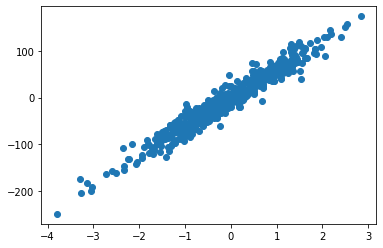

In [25]:
x=N_Cm.Count_Medals
y=N_Cm.GDP
x,y,coef=datasets.make_regression(n_samples=526,n_features=1,n_targets=1,n_informative=1,noise=15,coef=True)
plt.plot(x,y,'o')
plt.savefig('linear regression 1 data.png', dpi=350)

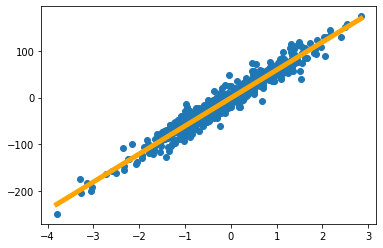

In [26]:
model = LinearRegression()
model.fit(x.reshape(526, 1), y)

xfit = np.linspace(min(x), max(x), 1000)
yfit = model.predict(xfit.reshape(1000, 1))

plt.scatter(x, y)
plt.plot(xfit, yfit, linewidth=5, color='orange');
plt.savefig('linear regression 2 data fit.png', dpi=350)

In [27]:
model.score(x.reshape(526,1),y)

0.9452482112538725

#### We got 94% success!

Let's compare the regression correlation with the K Mean Clustering algorithm and see which of the algorithms gives a better relationship result.

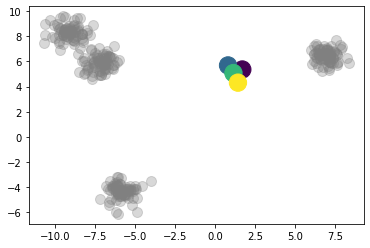

In [32]:
N_Cm,classes=make_blobs(n_samples=300,centers=4,cluster_std=0.60)
plt.scatter(N_Cm[:,0],N_Cm[:,1],c='grey',s=100,alpha=0.3)
centers = [0, 4] + np.random.rand(4, 2) * 2
plt.scatter(centers[:, 0], centers[:, 1], c=np.arange(4), cmap='viridis', s=300)

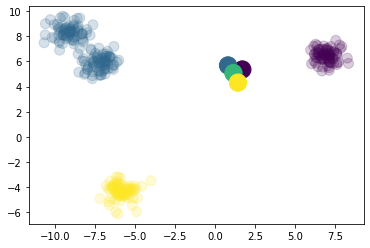

In [33]:
y_pred = pairwise_distances_argmin(N_Cm, centers)

plt.scatter(N_Cm[:, 0], N_Cm[:, 1], c=y_pred, cmap='viridis',
            s=50 * 2, alpha=0.2)

plt.scatter(centers[:, 0], centers[:, 1],
            c=np.arange(4), cmap='viridis', s=300)

<ipython-input-34-ab7714666dcd>:1: RuntimeWarning:

Mean of empty slice.

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning:

invalid value encountered in true_divide



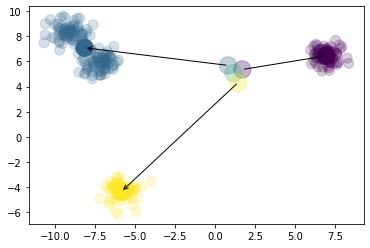

In [34]:
new_centers = np.array([N_Cm[y_pred == i].mean(0) for i in range(4)])

plt.scatter(N_Cm[:, 0], N_Cm[:, 1], c=y_pred, cmap='viridis',
            s=50 * 2, alpha=0.2)

plt.scatter(centers[:, 0], centers[:, 1],
            c=np.arange(4), cmap='viridis', s=300, alpha=0.3)

plt.scatter(new_centers[:, 0], new_centers[:, 1],
            c=np.arange(4), cmap='viridis', s=300)

for i in range(4):
    plt.annotate('', new_centers[i], centers[i],
                     arrowprops=dict(arrowstyle='->', linewidth=1))

In [31]:
centers = new_centers
data_pred = pairwise_distances_argmin(N_Cm, centers)
plt.scatter(N_Cm[:, 0], N_Cm[:, 1], c=data_pred, cmap='viridis', s=100, alpha=0.2)

plt.scatter(centers[:, 0], centers[:, 1],c=np.arange(4), cmap='viridis', s=300)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

we got a intersting value error. 
we need to check it/. 

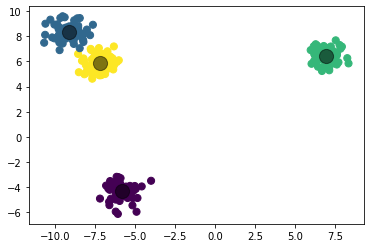

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(N_Cm)
data_kmeans = kmeans.predict(N_Cm)
plt.scatter(N_Cm[:, 0], N_Cm[:, 1], c=data_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [36]:
from scipy.stats import mode

labels = np.zeros_like(data_kmeans)
for i in range(4):
    mask = (data_kmeans == i)
    labels[mask] = mode(classes[mask])[0]

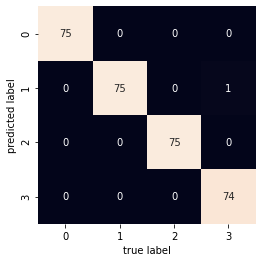

In [37]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(classes, labels)
sns.heatmap(mat.T, square=True, annot=True, cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

Each class seems to have exactly 75 data and kmean catalogs the data well.
This gives optimism but later we will have to make comparisons with other catalog methods in order to understand the final quality of the match.

# summary and Conclusions

So far I have performed a preliminary collection and analysis of the data, because the data is very broad, different types of analyzes can be performed on it. In my opinion, at this point the attempt to make a linear regression between the leading achievement countries and the product came out unequivocally. There is no doubt that further testing is needed by additional algorithms later on in order to reach an unequivocal expansion between the achievements in the Olympic Games (number of medals) and the product per capita.

The algorithms we have done so far bring us to the main part which is to examine whether it is possible to predict the amount of medals by country by sport.
We will try to predict a better result by using a number of factors such as the product per capita, the amount of population and whether there is an advantage in the home field or the height and weight ratio for each contestant by sport.
We will compare a number of algorithms to see who will bring the best prediction result.